# 시나리오
- 고객들로부터 다양한 파일이 업로드 되고 있음
- k-means알고리즘으로 사진들을 클러스터로 분류하여 폴더별로 저장함
- 저장공간 부족 문제 발생
- 군집 또는 분류 작업에 영향을 주지 않으면서 사진의 용량을 줄일 수 있을까?

## 차원과 차원 축소
### 차원 개념
- 분석에 사용되는 데이터의 컬럼들을 속성, 특성이라고 부름
- 과일 사진은 수치로 변환하여 10000개의 픽셀로 저장되어 있음(10000개의 특성)
- 머신러닝에서는 특성 하나하나를 차원이라고 지칭함
- 1차원 배열(벡터)과 2차원 배열에서 차원을 다르게 사용함
    - 2차원 배열에서는 행과 열을 차원으로 취급
    - 1차원 배열에서는 원소 하나를 차원으로 취급
### 차원 축소
- 데이터를 가장 잘 나타낼 수 있는 일부 특성을 선택하여 데이터의 크기를 줄이고 모델의 성능 향상을 기대
- 축소된 차원에서 다시 원본 차원으로 복원 가능(손실이 존재하지만 최대한 줄일 수 있음)
- 주성분 분석(PCA) 알고리즘을 많이 사용

### 주성분 분석
- 분산은 데이터가 퍼져있는 정도를 말함
- 데이터에 있는 분산이 큰 방향을 찾는 것
- 분산이 큰 방향이란 데이터를 잘 표현하는 어떤 벡터를 생각할 수 있음
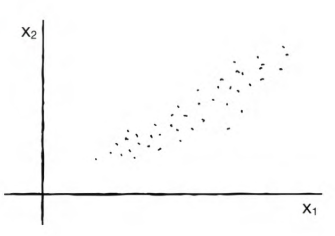
- 그림을 보면 $X_1$, $X_2$ 2개의 특성이 있음
- 이 데이터에서 가장 분산이 큰 방향(분포를 가장 잘 표현하는 방향)은 다음 그림과 같음
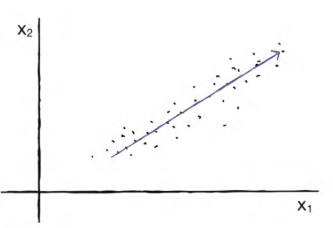
- 화살표의 위치는 의미 없음(아래로 향할 수도 있음)
- 분산이 큰 방향을 찾아야 함
- 그림의 직선이 원점에서 출발하는 것이라면 두 원소로 생성된 벡터로 표현할 수 있음
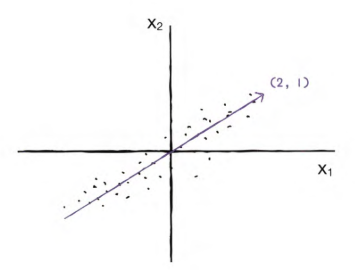
- PCA를 사용하면 자동으로 특성마나 평균값을 빼서 원점에 맞춤
- 위 벡터를 주성분(principal component)라고 함
- 주성분 벡터는 원본 데이터에 있는 어떤 방향을 말함(벡터의 원소개수는 데이터셋의 특성 개수와 같음)
- 샘플 데이터를 주성분에 직각으로 투영하여 1차원 데이터로 표현
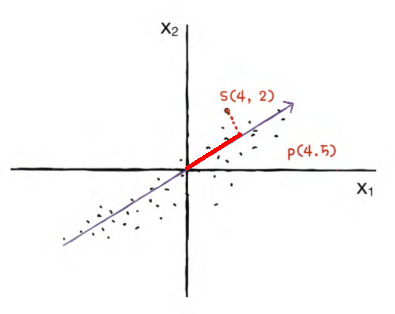
- 위와 같이 2차원 데이터를 1차원 데이터로 축소하는 것을 차원 축소라고 함
- 다음과 같이 2차원 데이터라면 두 가지의 고유 벡터가 있음
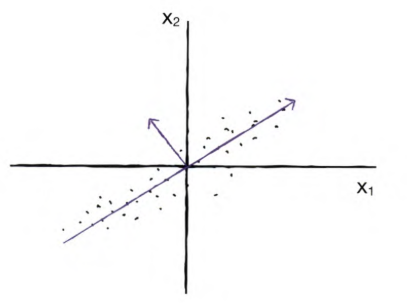
- 이 고유 벡터에서 분산이 가장 큰 벡터가 주성분이 되고 이 주성분에 데이터들을 투영하여 차원을 축소하는 것
- 따라서 주성분은 원본 특성의 개수를 모두 표현할 수 있음

## 사이킷-런의 PCA 클래스
- 주성분 분석을 통한 차원축소 기능을 제공함

### 데이터 준비

In [6]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

- PCA 클래스의 객체를 만들 때 n_components 매개변수에 차원을 축소할 주성분의 개수를 지정

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

- PCA 클래스가 찾은 주성분 확인 components_

In [8]:
pca.components_.shape

(50, 10000)

##### 설명
- n_components=50 설정으로 pca.components_배열의 첫 번째 차원이 50으로 확인됨(50개의 주성분)
- 두 번째 차원은 원본 데이터의 특성 개수(10000)
- 원본 데이터와 차원이 같으므로 주성분을 100x100 크기의 이미지형태로 출력 가능

In [9]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

- 주성분을 그림으로 그리기

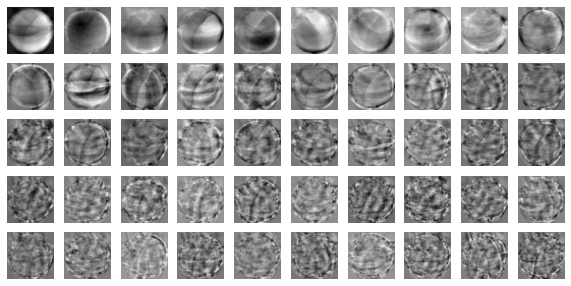

In [10]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

##### 설명
- 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것(데이터 셋의 특징을 잡아낸 의미)

- 찾아낸 주성분을 이용하여 원본 데이터를 주성분에 투영하여 특성의 개수를 10000에서 50개로 축소
- 원본 데이터를 각 주성분으로 분해하는 개념
- PCA의 transform() 사용

In [11]:
# 원본 데이터의 차원
fruits_2d.shape

(300, 10000)

In [12]:
# 주성분을 찾은 pca객체로 transform()하여 차원 축소)
fruits_pca = pca.transform(fruits_2d)

In [13]:
# 주성분분석을 통해 원본 데이터를 차원축소한 결과 확인
fruits_pca.shape

(300, 50)

##### 결과
- 원본 데이터의 10000개의 픽셀 정보를 50개로 줄임
- 원본 데이터 대신 차원이 축소된 데이터를 저장하면 저장공간을 확실하게 줄일 수 있음
- 축소된 데이터를 이용하여 원본 데이터를 만들어낼 수 있을까?

### 원본 데이터 재구성하기
- inverse_transform() 사용
- 50개의 차원으로 축소된 데이터를 이용하여 원래 10000개의 차원으로 복원

In [14]:
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

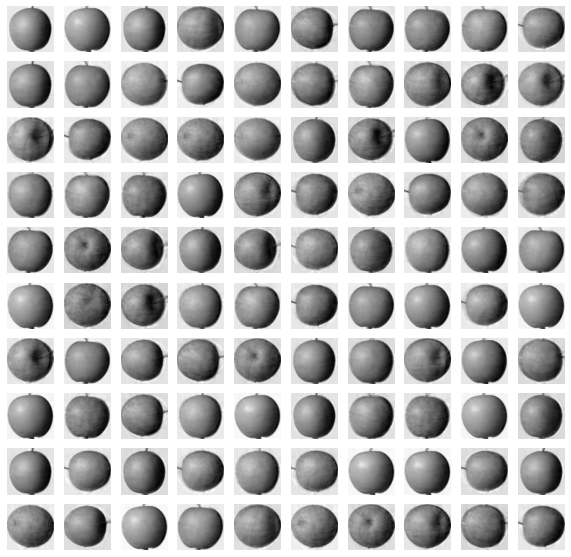

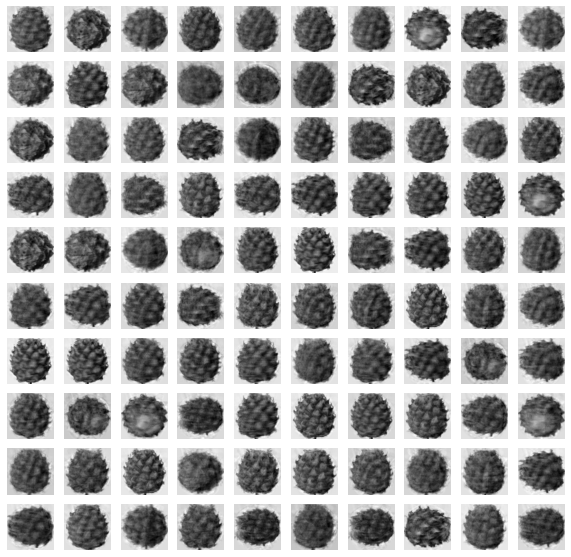

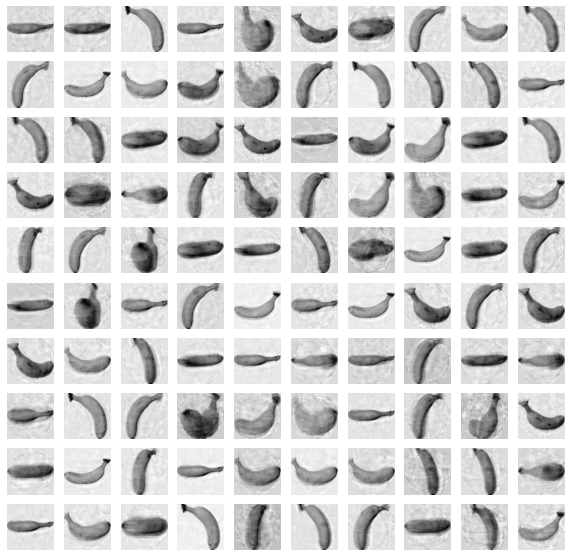

In [15]:
# 복원된 데이터를 100x100크기로 변환하여 100개씩 나누어 출력해보기(사과, 파인애플, 바나나 순서)
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])

##### 결과
- 거의 모든 과일이 복원에 성공
- 실제 원본과 비교하면 흐리거나 번진 것 같은 부분이 있음
- 50개의 픽셀정보를 이용하여 10000개의 특성으로 복원이 가능할 정도로 분산을 잘 보존하고 있음
- 주성분을 최대로 사용했다면 완벽하게 원본 데이터 재구성 가능

### 설명된 분산(explained variance)
- 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값
- PCA 클래스의 explained_variance_ratio_ 속성에 설명된 분산 비율이 기록됨
- 첫 번째 주성분의 설명된 분산이 가장 큼
- 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있음

In [16]:
# 주성분의 설명된 분산 비율
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645189, 0.00578895, 0.00511202, 0.00486383, 0.00480346,
       0.00447835, 0.00437308, 0.00408038, 0.00389476, 0.00372425,
       0.00359239, 0.00331477, 0.00317809, 0.00304316, 0.00303652,
       0.00288929, 0.00275896, 0.00264887, 0.00255894, 0.00251985,
       0.00247402, 0.00239196, 0.00230534, 0.00221933, 0.00216484,
       0.00213773, 0.00195059, 0.0019234 , 0.00190791, 0.00185306,
       0.00180637, 0.00174383, 0.00169703, 0.0016166 , 0.00159872])

In [17]:
# 총 분산 비율
np.sum(pca.explained_variance_ratio_)

0.9215426380418068

##### 해석
- 92%의 분산을 유지하고 있음
- 50개의 특성을 원본 데이터로 복원할 때 복원율을 의미
- 설명된 분산의 비율을 그래프로 그리면 적절한 주성분 개수를 찾는데 도움이 됨

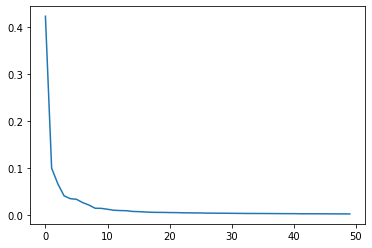

In [18]:
# 설명된 분산의 비율을 그래프로 그리기
plt.plot(pca.explained_variance_ratio_)

##### 해석
- 처음 10개의 주성분이 대부분의 분산을 표현함
- 그 뒤로는 설명하는 분산이 비교적 작음

### 다른 알고리즘과 함께 사용
- PCA로 차원 축소된 데이터와 원본 데이터와의 훈련 결과 차이 확인하기

#### 3개의 과일 사진을 분류해야 함
- 로지스틱 회귀 모델 사용

In [39]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1500)

#### 타겟 값 준비
- 사과 0, 파인애플 1, 바나나 2로 지정

In [20]:
import numpy as np
target = np.array([0] * 100 + [1] * 100 + [2] * 100)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### 원본 데이터 fruits_2d를 사용하여 로지스틱 회귀의 성능을 가늠하기 위해 교차검증 진행
- cross_validate()

In [23]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.35818705558776853


##### 결과
- 교차검증의 점수는 0.997로 매우 높음
- 특성이 10000개 이므로 300개에 대한 과적합 모델이 자연스럽게 만들어짐
- cross_validate()의 반환하는 딕셔너리의 fit_time에는 각 교차검증 폴드의 훈련 시간이 기록되어 있음

#### PCA로 축소한 데이터를 이용하여 교차검증
- 원본 데이터와 결과 비교

In [29]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.022548532485961913


##### 결과
- 50개의 특성으로 축소된 데이터로 100% 정확도를 나타냄
- 0.02초 정도로 매우 훈련 속도도 빠름
##### 추가내용
- n_components 매개변수에 실수를 입력하면 설명된 분산의 비율로 동작함
- n_components=0.5 -> 설명된 분산의 50%에 달하는 주성분을 찾을 때까지 자동으로 주성분을 찾음

In [30]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [33]:
# 찾은 주성분의 개수
pca.n_components_

2

##### 결과
- 두 개의 특성만으로 원본 데이터의 50% 만큼의 분산을 표현할 수 있음

#### 최종 모델 적용
- 교차검증으로 확인한 내용을 바탕으로 모델을 구성

In [44]:
from sklearn.linear_model import LogisticRegression

#lr = LogisticRegression(max_iter=1500)
lr = LogisticRegression()

In [42]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [45]:
# 교차검증
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.028844928741455077


C:\Users\itthi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\itthi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

##### 결과
- 로지스틱회귀 모델이 완전히 수렴하지 못하여 반복 횟수를 증가하라는 경고 발생(검증 결과가 좋으므로 무시)
- 두 개의 특성만으로 99%의 정확도를 보임

#### k-means 알고리즘에 PCA로 축소된 데이터 사용
- 클러스터 찾기

In [46]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

In [48]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2]), array([110,  99,  91], dtype=int64))

##### 결과
- fruits_pca로 찾은 클러스터는 각각 110, 99, 91개의 샘플을 가짐
- 앞서 원본 데이터를 이용했을 때의 결과와 거의 비슷함

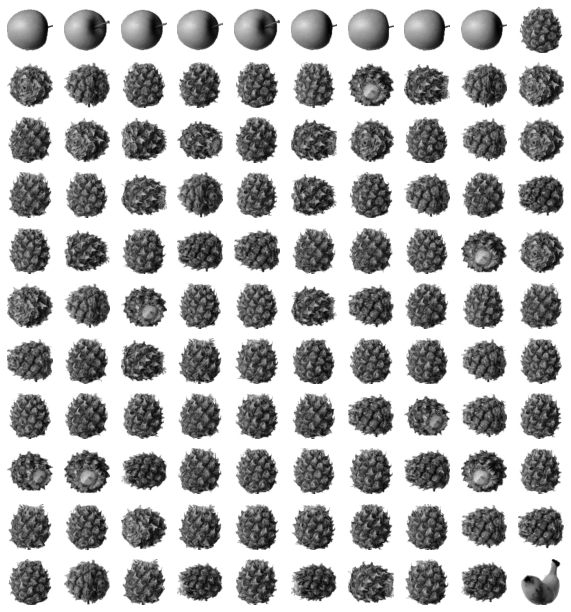

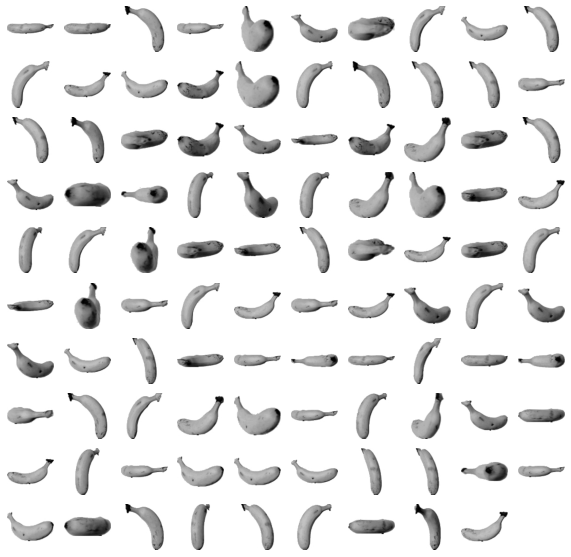

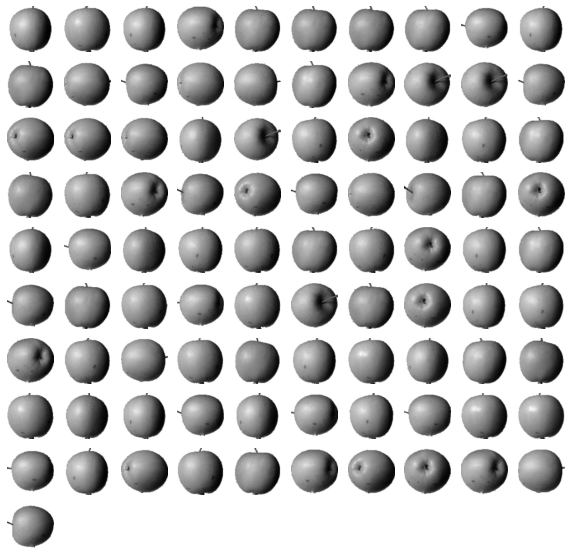

In [50]:
# KMeans의 결과를 이용하여 과일 이미지 출력하기
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])

##### 해석
- 파인애플이 사과와 조금 구분이 안됨
- 훈련 데이터의 차원을 줄이면 위와 같이 시각화가 수월해짐
- fruits_pca는 2개의 특성이 있으므로 2차원으로 표현 가능

#### 시각화
- km.labels_를 이용하여 산점도 그리기

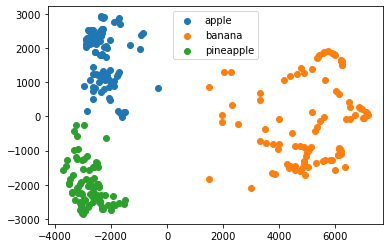

In [51]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

##### 결과
- 각 클러스터의 산점도가 잘 구분됨
- 사과와 파인애플의 경계가 가까움(혼동 가능성 존재)
- 데이터 시각화를 통해 예상하지 못한 인사이트를 얻을 수도 있음